# Airbnb's Business Question and Plan for Success

## Understanding the Business Question

-- The Objective of the Business Problem:

    -- 1.0. Prediction of which country a new user's first booking destination will be upon using Airbnb.

-- Proposal for Solution:

-- 

## The Business Planning

# <font color = 'green'> ----- Cycle 1: First Sprint ----- </font>

# 0. Imports 

## 0.1. Libraries:

In [10]:
import sys

!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install scikit-plot
!{sys.executable} -m pip install seaborn


# ----------------------------------------------------------------

# Libraries installed: (pip freeze > requirements.txt)

# keras
# tensorflow
# scikit-plot
# seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from IPython.core.display import HTML

from matplotlib import pyplot as plt

from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import metrics         as m

from scikitplot import metrics as mt

from keras import models as ml
from keras import layers as l

2022-03-15 09:28:58.925191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-15 09:28:58.925220: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 0.2. Helper Functions

In [2]:
# Função auxiliar para construcão do layout:
def jupyter_settings():
    %matplotlib inline
#     %matplotlib inline
    
    plt.style.use( 'bmh' )
    plt.rcParams[ 'figure.figsize' ] = [20, 10]
    plt.rcParams[ 'font.size' ] = 20
    
    display( HTML( '<style>.container { width:95% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [4]:
jupyter_settings()

## 0.3. Loading the data

In [5]:
df_raw = pd.read_csv( '../datasets/training_users.csv', low_memory=True )
print( 'Data size for df_raw: {}'.format(df_raw.shape) )

Data size for df_raw: (213451, 16)


In [6]:
# df_sessions = pd.read_csv( '/content/drive/MyDrive/Colab_Notebooks_Updates/airbnb_predict_first_booking/datasets/sessions.csv', low_memory=True )
# print( 'Data size for df_sessions: {}'.format(df_sessions.shape) )


# # Para o caso de se realizar um merge de ambos os datasets devido a GRANULARIDADE.

# # A fim de decidir qual granularidade deverá ser implementada no merge dos datasets, as seguintes questões devem ser consideradas:
# ## A previsão é feita em funcão do usuário
# ## A previsão é feita em funcão do usuário + evento ('action')

# # Exemplo: Retornar as acões realizadas por um usuário aleatório da plataforma durante o período em que esteve ativo:

# df_sessions[ df_sessions['user_id'] == '00023iyk9l' ][['user_id', 'action']].groupby('user_id').count()
# # Da mesma forma, a fim de retornar os valores referentes à todas as acões do usuário '00023iyk9l':

# df_sessions[ df_sessions['user_id'] == '00023iyk9l' ][['user_id', 'action']].value_counts()

# 1. Data Description

In [7]:
df1 = df_raw.copy()

In [8]:
# For the 'df_raw' dataset, which regards to the 'training_users.csv' dataset, the dimensions of it are as follows:

print( 'Number of columns: {}'.format( df1.shape[1] ) )
print( 'Number of rows: {}'.format( df1.shape[0] ) )

Number of columns: 16
Number of rows: 213451


## 1.1. Data Types

In [10]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [11]:
df1.sample().T

,36441
id,k2koskdbd9
date_account_created,2012-08-14
timestamp_first_active,20120814160712
date_first_booking,NaN
gender,MALE
age,36.0
signup_method,facebook
signup_flow,0
language,en
affiliate_channel,direct


## 1.2. Checking for NA Data

In [12]:
df1.isna().sum()

# Data which need to be converted from NA to actual usable data:

## 'date_first_booking'
## 'age'
## 'first_affiliate_tracked'

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## 1.3. Changing the Data Types

In [13]:
## Num primeiro momento (1º ciclo CRISP), valores NA não serão considerados durante a análise do modelo. Isso porque o objetivo é atingir velocidade 
## na apresentação dos resultados iniciais. Caso as variáveis 'date_first_booking', 'age' e 'first_affliate_tracked', em um 2º ciclo do projeto, sejam interessante 
## para a modelagem, então estes serão introduzidos como features relevantes para a análise.

# Shape of dataframe containing NA:
print( 'Number of total columns before NA dropping: {}'.format( df_raw.shape[1] ) )
print( 'Number of total rows before NA dropping: {}'.format( df_raw.shape[0] ) )

# Removing missing values (Containing NA):
df1 = df1.dropna()

# Shape of dataframe after removing NA:
print( '\nNumber of total columns after NA dropping: {}'.format( df1.shape[1] ) )
print( 'Number of total rows after NA dropping: {}'.format( df1.shape[0] ) )

Number of total columns before NA dropping: 16
Number of total rows before NA dropping: 213451

Number of total columns after NA dropping: 16
Number of total rows after NA dropping: 68171


In [14]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [15]:
# Date which the account was created ('date_account_created'):
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

# Timestamp that the user was active the first time ('timestamp_first_active'):
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format = '%Y%m%d%H%M%S' )

## (In this case, it'll be necessary to not only change from 'int64' to 'datetime', but also to divide into an actual date pattern)

# Date for when the user booked the first time ('date_first_booking'):
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )

# Age:
df1['age'] = df1['age'].astype( int )


In [16]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

## 1.4. Checking of Balanced Data

In [17]:
df1['country_destination'].value_counts( normalize=True )

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2. Data Filtering and Cleansing

In [18]:
df2 = df1.copy()

## 2.1 Filtering Rows

## 2.2 Columns Selection

# 3. Data Preparation

In [41]:
df3 = df2.copy()

In [42]:
df3.shape

(68171, 16)

In [44]:
# dummy variable:
df3_dummy = pd.get_dummies( df3.drop( ['id', 'country_destination'], axis=1 ) )

# Joining again 'id' and 'country_destination' with dummy variable:
df3 = pd.concat( [ df3[['id', 'country_destination']], df3_dummy ], axis=1 )

In [45]:
df3.shape

(68171, 117)

# 4. Feature Selection of Variables

In [46]:
# Dropping original dates due to lack of further information that could be used by the model:
cols_drop = [ 'date_account_created', 'timestamp_first_active', 'date_first_booking' ]

df4 = df3.drop( cols_drop, axis = 1 )

# 5.0 Machine Learning Model - Neural Network MLP

In [47]:
X = df4.drop( 'country_destination', axis=1 )

y = df4['country_destination'].copy()

In [48]:
# Split of prepared dataset into training and test datasets:
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=32 )

In [49]:
x_train = X_train.drop( 'id', axis=1 )
x_test = X_test.drop( 'id', axis=1 )

print( 'Shape for training set: {}'.format( x_train.shape ) )
print( 'Shape for test set: {}'.format( x_test.shape ) )

Shape for training set: (54536, 112)
Shape for test set: (13635, 112)


## 5.1. Transforming the categorical variables

In [50]:
ohe = pp.OneHotEncoder()

# While transforming the categorical attributes (i.e. y_train) by using the One Hot Encoding transformation method, one needs
# to perform it within the Neural Network (NN):
y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()

In [51]:
y_train_nn

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 5.2. Building up the Neural Network

In [52]:
# Model definition:
model = ml.Sequential()

# First layer of neural network:
model.add( l.Dense( 128, input_dim=x_train.shape[1], activation='relu' ) )  

# Second or exit layer for neural network:
model.add( l.Dense( 11, activation='softmax' ) )

# Compiling the model:
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# Training the model:
model.fit( x_train, y_train_nn, epochs=100 )

  


Epoch 1/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.3834 - accuracy: 0.7006
Epoch 2/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2566 - accuracy: 0.7081
Epoch 3/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2428 - accuracy: 0.7080
Epoch 4/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2248 - accuracy: 0.7080
Epoch 5/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1998 - accuracy: 0.7087
Epoch 6/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1837 - accuracy: 0.7085
Epoch 7/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1676 - accuracy: 0.7086
Epoch 8/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1520 - accuracy: 0.7087
Epoch 9/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1442 - accuracy: 0.7089
Epoch 10/100
1705/1705 [==============================] - 3s 2ms/step - l

# 6. Neural Network (NN) Performance

## 6.1. Evaluating the prediction performance

In [54]:
# Evaluating the prediction after testing:
pred_nn = model.predict( x_test )

# Evaluating the inverted prediction:
yhat_nn = ohe.inverse_transform( pred_nn )

# Prediction prepare:
y_test_nn = y_test.to_numpy()

yhat_nn = yhat_nn.reshape( 1, -1 )[0]

## 6.2. Post-Evaluation of Metrics

In [56]:
# Accuracy
accur_nn = m.accuracy_score( y_test_nn, yhat_nn )

print( 'Accuracy from model: {}%'.format( accur_nn*100 ) )

Accuracy from model: 70.3043637697103%


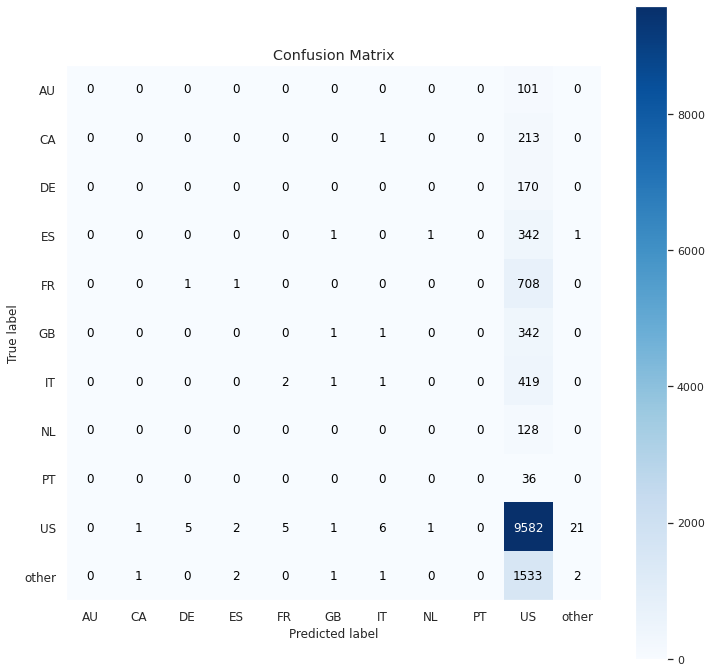

In [57]:
# Confusion matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False, figsize=(12, 12) );

In [58]:
# Balanced Accuracy
balanced_accur_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)

print( 'Balanced accuracy for NN: {}%'.format(balanced_accur_nn*100) )

Balanced accuracy for NN: 9.110960495101633%


In [62]:
# Classification Report:
print( m.classification_report(y_test_nn, yhat_nn) )

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       214
          DE       0.00      0.00      0.00       170
          ES       0.00      0.00      0.00       345
          FR       0.00      0.00      0.00       710
          GB       0.20      0.00      0.01       344
          IT       0.10      0.00      0.00       423
          NL       0.00      0.00      0.00       128
          PT       0.00      0.00      0.00        36
          US       0.71      1.00      0.83      9624
       other       0.08      0.00      0.00      1540

    accuracy                           0.70     13635
   macro avg       0.10      0.09      0.08     13635
weighted avg       0.52      0.70      0.58     13635



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# Kappa Metrics:
kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)

print( 'Kappa Score for NN: {}%'.format(kappa_nn*100) )

Kappa Score for NN: 0.03191446597184955%
